In [1]:
import os
import sys
import glob
import numpy as np
import cv2
import json
import matplotlib.colors as mcol
import matplotlib.cm as cm
import time
from skimage import exposure 
import glob
%matplotlib inline
from matplotlib import pyplot as plt

In [14]:
x = glob.glob("/workspace/HDD/200602/200602_drive_1_W36_M8_RF0_ANT3/S_ANT/*.npy")

print(x[1000])
y = np.load(x[10])
print(y.shape)


/workspace/HDD/200602/200602_drive_1_W36_M8_RF0_ANT3/S_ANT/S_ANT_1591086490184214064.npy
(1024, 48, 48)


In [2]:
p = "/workspace/HDD/200603/191126_drive_1_W36_M8_RF1_ANT3/camera_road_seg/camera_road_seg_1517158258016213702.npz"

x = np.load(p)["arr_0"]
print(x.shape)

(940, 1824)


In [4]:
# dirs = ['200319_drive_0_W60_M8_RF0', '200319_drive_1_W60_M8_RF0', '200319_drive_2_W60_M8_RF0',
#        '200322_drive_0_W60_M8_RF0', '200322_drive_1_W60_M8_RF0', '200322_drive_2_W60_M8_RF0']

# disc = ['HDD', 'HDD', 'HDD', 'HDD', 'HDD', 'HDD']

dirs = ['200319_drive_0_W60_M8_RF0']

disc = ['HDD']
for i in range(len(dirs)):
    dir_path = '/workspace/'+disc[i]+'/64mWF/' + dirs[i] + "/"
    print(dir_path)
    images = glob.glob(dir_path + "camera_rgb/*.png")
    break

/workspace/HDD/64mWF/200319_drive_0_W60_M8_RF0/


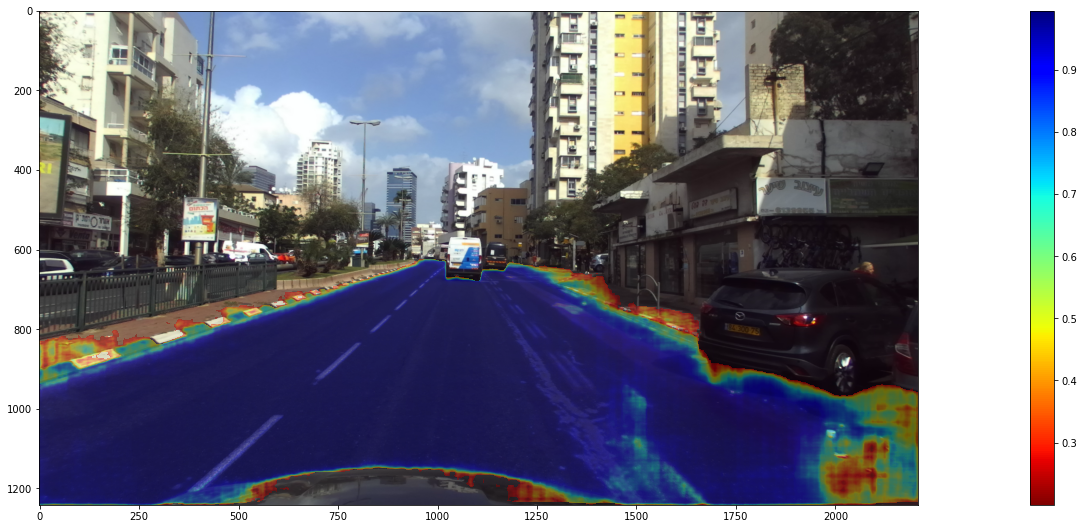

In [45]:
from PIL import Image

def fig2data ( fig ):
    """
    @brief Convert a Matplotlib figure to a 4D numpy array with RGBA channels and return it
    @param fig a matplotlib figure
    @return a numpy 3D array of RGBA values
    """
    # draw the renderer
    fig.canvas.draw ( )
 
    # Get the RGBA buffer from the figure
    w,h = fig.canvas.get_width_height()
    buf = np.fromstring ( fig.canvas.tostring_argb(), dtype=np.uint8 )
    buf.shape = ( w, h,4 )
 
    # canvas.tostring_argb give pixmap in ARGB mode. Roll the ALPHA channel to have it in RGBA mode
    buf = np.roll ( buf, 3, axis = 2 )
    return buf

def fig2img(fig):
    """
    @brief Convert a Matplotlib figure to a PIL Image in RGBA format and return it
    @param fig a matplotlib figure
    @return a Python Imaging Library ( PIL ) image
    """
    # put the figure pixmap into a numpy array
    buf = fig2data ( fig )
    w, h, d = buf.shape
    return np.array(Image.frombytes( "RGBA", ( w ,h ), buf.tostring( )))

rand_image = images[np.random.randint(len(images))]
img = cv2.cvtColor(cv2.imread(rand_image).astype(np.uint8), cv2.COLOR_BGR2RGB)
ts = os.path.split(rand_image)[-1].split("_")[-1].split(".")[0]
road_seg = rand_image.replace("camera_rgb", "camera_road_seg")
road_seg = road_seg.replace("rgb_camera", "camera_road_seg")
label = cv2.resize(np.load(road_seg[:-3] + "npz")["arr_0"], None, fx=2, fy=2)

label[label<0.2] = None
plt.figure(figsize=(40,20))
plt.subplot(2,1,1)
im = plt.imshow(img)
plt.imshow(label, cmap=plt.cm.jet_r, alpha=0.4)
cbar = plt.colorbar()
cbar.set_alpha(1)
cbar.draw_all()

rand_image = images[np.random.randint(len(images))]

#cv2.addWeighted(_fig, 0.4, img, 0.6, 0)
# # # image
# img = cv2.cvtColor(cv2.imread(rand_image).astype(np.uint8), cv2.COLOR_BGR2RGB)
# plt.subplot(2,1,2) 
# plt.imshow(img)
# plt.colorbar(orientation='horizontal')
# plt.show()
